In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"

os.environ["CUDA_VISIBLE_DEVICES"]="1"

import keras.backend as K;[x.name for x in K.get_session().list_devices()]

c:\users\ni_po\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\ni_po\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\users\ni_po\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


['/job:localhost/replica:0/task:0/device:CPU:0']

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
mean = train_data.mean(axis=0)
train_data -=mean

std = train_data.std(axis=0)
train_data /=std

test_data -=mean
test_data /=std

In [4]:
from keras import models
from keras import layers
from keras import metrics

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'],run_eagerly=True)
    return model

In [5]:
import numpy as np

k = 4
num_val_samples = len(train_data)
num_epochs = 100
all_scores = []
all_mae_history = []

for i in range(1,k):
    print('processing fold #', i)
    val_data = test_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = test_data[i*num_val_samples: (i+1)*num_val_samples]

    partial_train_data = np.concatenate([train_data[:(i*num_val_samples)],train_data[((i+1)*num_val_samples):]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:(i*num_val_samples)],train_targets[((i+1)*num_val_samples):]],axis=0)
    model = build_model()

    history = model.fit(partial_train_data, 
              partial_train_targets,
              validation_data=(val_data,val_targets),
              epochs = num_epochs,
              batch_size=1,
                       verbose=0)

    # val_mse, val_mae = model.evaluate(val_data, val_targets)
    # all_scores.append(val_mae)
    mae_history = history.history['mae']
    #print(history.history)
    all_mae_history.append(mae_history)


processing fold # 1
{'loss': [224.87545776367188, 26.435638427734375, 17.961360931396484, 14.769172668457031, 14.282021522521973, 12.735703468322754, 11.978483200073242, 11.348159790039062, 11.000348091125488, 10.918349266052246, 10.239204406738281, 9.845355033874512, 10.243870735168457, 9.735292434692383, 9.105642318725586, 9.075013160705566, 9.252681732177734, 9.004551887512207, 8.871047019958496, 8.67221736907959, 8.177145004272461, 8.37844181060791, 8.693401336669922, 8.361480712890625, 8.26859188079834, 7.866421222686768, 7.967696189880371, 7.77419900894165, 7.7804460525512695, 7.76853609085083, 7.564969062805176, 7.167557239532471, 7.414243221282959, 7.180462837219238, 7.432297706604004, 7.246086597442627, 6.978641510009766, 7.022636413574219, 6.864852428436279, 6.716160774230957, 6.568941116333008, 6.63692045211792, 6.527282238006592, 6.581480503082275, 6.660952568054199, 6.249175071716309, 6.482503414154053, 5.995822429656982, 6.38964319229126, 6.154140472412109, 6.285737037658

In [6]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

Text(0, 0.5, 'validation mae')

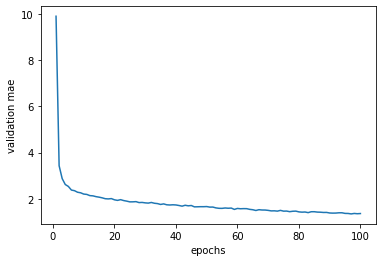

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("epochs")
plt.ylabel("validation mae")

In [9]:
def smoothCurve(points, factor=0.9):
    smoothedPoints = []
    for point in points:
        if smoothedPoints:
            previous = smoothedPoints[-1]
            smoothedPoints.append(previous*factor+point*(1-factor))
        else:
            smoothedPoints.append(point)
    return smoothedPoints

Text(0, 0.5, 'validation mae')

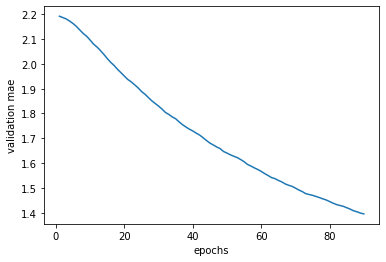

In [11]:
smoothMaeHistory = smoothCurve(average_mae_history[10:])

plt.plot(range(1,len(smoothMaeHistory)+1), smoothMaeHistory)
plt.xlabel("epochs")
plt.ylabel("validation mae")